469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 232ms/step - loss: 0.2501 - val_loss: 0.0800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


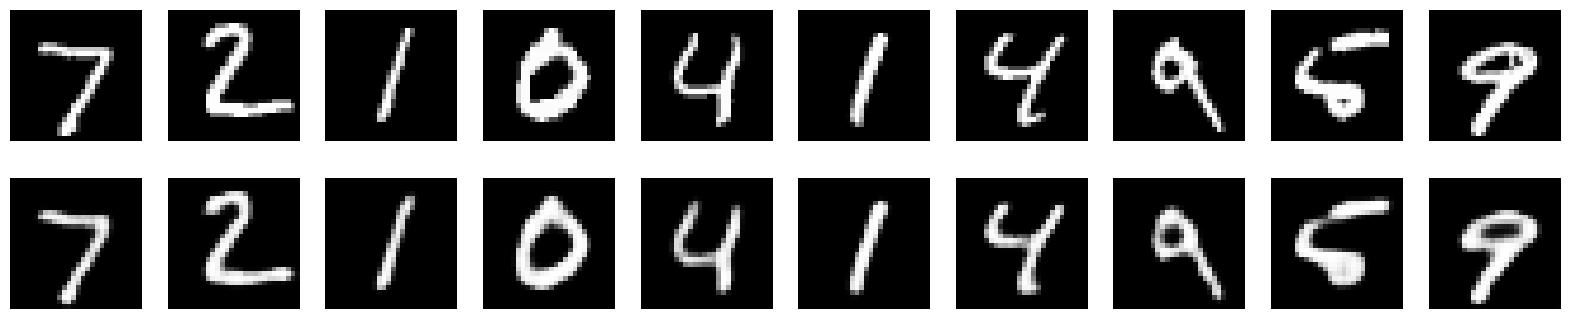

In [2]:
#undercomplete
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

# Autoencoder model
input_img = layers.Input((28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train, epochs=1, batch_size=128,
                shuffle=True, validation_data=(x_test, x_test))

# Predict
reconstructed = autoencoder.predict(x_test[:10])

# Display original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(10):
    for j, img in enumerate([x_test[i], reconstructed[i]]):
        ax = plt.subplot(2, 10, i + 1 + j * 10)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
plt.show()
